In [3]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
zip_adress="/content/drive/MyDrive/Flower_Recognition.zip"
!cp "{zip_adress}" .

In [6]:
!unzip -q Flower_Recognition.zip
!rm Flower_Recognition.zip

#IMPORTING LIBRARIES

In [7]:
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

#DATA PREPROCESSING



In [8]:
images_path='training_set'
os.listdir(images_path)

['sunflower', 'dandelion', 'tulip', 'daisy', 'rose']

TRAINING IMAGE PREPROCESSING

In [9]:
images_path = 'training_set'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


TEST IMAGE PROCESSING


In [10]:
# We creating the training dataset
training_set = train_datagen.flow_from_directory(
    images_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 4317 images belonging to 5 classes.


In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# We creating the test dataset
test_set = test_datagen.flow_from_directory(
    'test_set',
    target_size=(64, 64),
    batch_size=12,
    class_mode='categorical'
)

Found 866 images belonging to 5 classes.


BULDING MODEL

In [ ]:
# We define the CNN model
flower_cnn = tf.keras.models.Sequential()

# We add the first convolution layer
flower_cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))

# We add the maximum pooling layer
flower_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# We add the second convolution layer
flower_cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))

# We add the maximum pooling layer
flower_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# We add the dropout layer (to reduce overfitting) için)
flower_cnn.add(tf.keras.layers.Dropout(0.5))

# Adding the smoothing layer
flower_cnn.add(tf.keras.layers.Flatten())

# We add a fully connected layer
flower_cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Adding the output layer
flower_cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

# We compile the model and make it ready for training
flower_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# We train the model
history =flower_cnn.fit(x=training_set, validation_data=test_set, epochs=30)
print(history)

Epoch 1/30
135/135 [==============================] - 64s 469ms/step - loss: 1.2928 - accuracy: 0.4552 - val_loss: 1.0888 - val_accuracy: 0.5774
Epoch 2/30
135/135 [==============================] - 69s 508ms/step - loss: 1.0649 - accuracy: 0.5766 - val_loss: 0.9640 - val_accuracy: 0.6351
Epoch 3/30
135/135 [==============================] - 69s 513ms/step - loss: 0.9737 - accuracy: 0.6210 - val_loss: 0.8898 - val_accuracy: 0.6386
Epoch 4/30
135/135 [==============================] - 64s 474ms/step - loss: 0.9008 - accuracy: 0.6498 - val_loss: 0.7634 - val_accuracy: 0.7067
Epoch 5/30
135/135 [==============================] - 63s 465ms/step - loss: 0.8368 - accuracy: 0.6794 - val_loss: 0.6675 - val_accuracy: 0.7714
Epoch 6/30
135/135 [==============================] - 64s 472ms/step - loss: 0.7957 - accuracy: 0.7007 - val_loss: 0.6874 - val_accuracy: 0.7425
Epoch 7/30
135/135 [==============================] - 63s 469ms/step - loss: 0.7798 - accuracy: 0.6928 - val_loss: 0.5924 - val_ac

VISUALIZING DISTRIBUTION

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Getting class distribution for training set
train_class_labels = list(training_set.class_indices.keys())
train_class_counts = np.unique(training_set.classes, return_counts=True)[1]

#Getting class distribution for validation set
val_class_labels = list(test_set.class_indices.keys())
val_class_counts = np.unique(test_set.classes, return_counts=True)[1]

#Getting class distribution for test set
test_class_labels = list(test_set.class_indices.keys())
test_class_counts = np.unique(test_set.classes, return_counts=True)[1]

#Visualizing class distribution for training set
plt.figure(figsize=(8, 6))
plt.bar(train_class_labels, train_class_counts)
plt.title('Training Set ')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

# Visualizing class distribution for validation set
plt.figure(figsize=(8, 6))
plt.bar(val_class_labels, val_class_counts)
plt.title('Validation Set ')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

# Visualizing the class distribution for the test set
plt.figure(figsize=(8, 6))
plt.bar(test_class_labels, test_class_counts)
plt.title('Test Set ')
plt.xlabel('class')
plt.ylabel('count')
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Getting the accuracy and loss values obtained while training the model
#history = cnn.fit(x=training_set, validation_data=test_set, epochs=30)

# Getting accuracy and loss values for each epoch
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Calculating  the number of batches
batches_per_epoch = len(training_set)
total_batches = len(training_set) * 30

# Properly generating accuracy and loss values for each batch
batch_indices = [i/batches_per_epoch for i in range(total_batches)]
batch_train_accuracy = []
batch_val_accuracy = []
batch_train_loss = []
batch_val_loss = []

for i in range(30):
    batch_train_accuracy.extend(train_accuracy[i] for _ in range(batches_per_epoch))
    batch_val_accuracy.extend(val_accuracy[i] for _ in range(batches_per_epoch))
    batch_train_loss.extend(train_loss[i] for _ in range(batches_per_epoch))
    batch_val_loss.extend(val_loss[i] for _ in range(batches_per_epoch))

# Visualizing accuracy values
plt.plot(batch_indices, batch_train_accuracy, 'b', label='Training Accuracy')
plt.plot(batch_indices, batch_val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy Values')
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualizing lost values
plt.plot(batch_indices, batch_train_loss, 'b', label='Training Loss')
plt.plot(batch_indices, batch_val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss Values')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend()
plt.show()


EVALUATIN MODEL PERFORMANS

In [ ]:
import matplotlib.pyplot as plt

# Getting the accuracy and loss values obtained while training the model
#history = cnn.fit(x=training_set, validation_data=test_set, epochs=30)

# Getting accuracy and loss values for each epoch
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

#Visualizing accuracy values for each epoch
batches = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy:')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy:')
plt.title('Training and Validation Accuracy Values:')
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy:')
plt.legend()
plt.show("\t")


# Her epoch için kayıp değerlerini görselleştirin
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss Values:')
#plt.xlabel('Epochs')
#plt.ylabel('Loss:')
plt.legend()
plt.show()


BUILDING CONVOLUTIONAL LAYER

In [ ]:
import matplotlib.pyplot as plt

# Getting the accuracy and loss values obtained while training the model
#history = cnn.fit(x=training_set, validation_data=test_set, epochs=30)

# Getting accuracy and loss values for each epoch
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Printing accuracy and loss values for each epoch
for epoch in range(len(train_accuracy)):
    print(f"Epoch {epoch+1}:")
    print(f"   Training Accuracy: {train_accuracy[epoch]:.4f}")
    print(f"   Validation Accuracy: {val_accuracy[epoch]:.4f}")
    print(f"   Training Loss : {train_loss[epoch]:.4f}")
    print(f"   Validation Loss: {val_loss[epoch]:.4f}")
    print("---------------------------")

# Visualizing accuracy values for each epoch
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy:')
plt.title('Training and Validation Accuracy Values:')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualizing loss values for each epoch
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training ve Validation Loss Values')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [64]:
from tensorflow.keras.preprocessing import image
import numpy as np
 # Updating 'mymodel.h5' filename and path to where your model is saved


test_image = image.load_img('Prediction/d.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = flower_cnn.predict(test_image)

1/1 [==============================] - 0s 43ms/step


In [65]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [66]:
print(result)

[[0. 0. 0. 1. 0.]]


In [67]:
from math import e
print(result)
if result[0][0]==1:
  print("Prediction: Daisy")
elif result[0][1]==1:
  print('Prediction: Dandelion')
elif result[0][2]==1:
  print("Prediction:   Rose")
elif result[0][3]==1:
  print("Prediction: Sunflower")
else:
  print(" Prediction:  Tulip")


[[0. 0. 0. 1. 0.]]
Prediction: Sunflower


VISUALIZING THE PREDICTON

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Uploading image to guess
test_image = image.load_img('Prediction/tulip.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# making an estimate
result = flower_cnn.predict(test_image)

# Getting class labels
class_indices = training_set.class_indices

# Determining the predicted class
predicted_class = None
for i, value in class_indices.items():
    if result[0][value] == 1:
        predicted_class = i
        break

# Visualizing the predicted picture
plt.imshow(test_image[0] / 255.0)
plt.axis('off')

# Printing the predicted class
print("\n" ,result,"\n")
plt.text(10, -20, f"Prediction: {predicted_class}", color='white', backgroundcolor='green', fontsize=12)
plt.show()


VISUALIZING MODEL

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 flatten_15 (Flatten)        (None, 12544)           

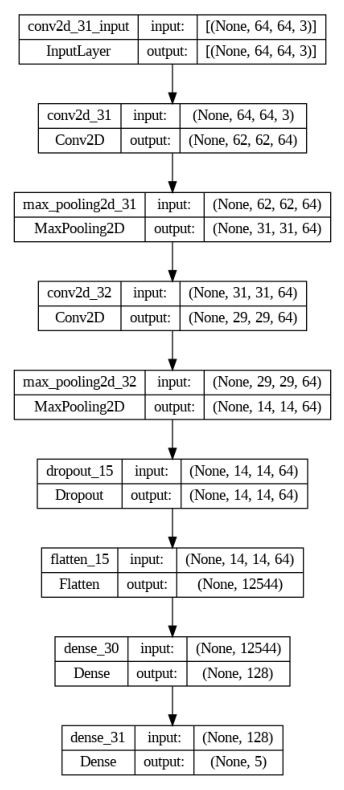

In [58]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Defining the CNN model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

# Compilining the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
# Visualizing and saving the model
plot_model(model, to_file='CNN_Model.png', show_shapes=True, show_layer_names=True)

# Uploading the created image
image = plt.imread('CNN_Model.png')

# ploting the output
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()
